In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league-standings-11-seasons-20102021/EPL Standings 2000-2022.csv
/kaggle/input/epl-latest-season/latest_current_season.csv
/kaggle/input/epl-current-season/current_season.csv


# **Previous Season Results**

#### *Note: UEFA started allowing the 4th place team to go straight to the Champions League group stage in the 2018-19 season.

### **Get previous season results into dataframe**

In [2]:
#create dataframe
past_seasons_df = pd.read_csv('/kaggle/input/premier-league-standings-11-seasons-20102021/EPL Standings 2000-2022.csv')

past_seasons_df.head(20)




,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]
5,2000-01,6,Chelsea,38,17,10,11,68,45,23,61,Qualification for the UEFA Cup first round[a]
6,2000-01,7,Sunderland,38,15,12,11,46,41,5,57,Not Applicable
7,2000-01,8,Aston Villa,38,13,15,10,46,43,3,54,Qualification for the Intertoto Cup third round
8,2000-01,9,Charlton Athletic,38,14,10,14,50,57,-7,52,Not Applicable
9,2000-01,10,Southampton,38,14,10,14,40,48,-8,52,Not Applicable


In [3]:
past_seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


# **Data Quality Report**

In [4]:
data_types = pd.DataFrame(past_seasons_df.dtypes, columns=['Data Type'])
missing_data = pd.DataFrame(past_seasons_df.isnull().sum(), columns=['Missing Values'])

unique_values = pd.DataFrame(columns=['Unique Values'])
for row in list(past_seasons_df.columns.values):
    unique_values.loc[row] = [past_seasons_df[row].nunique()]

maximum_values = pd.DataFrame(columns=['Max Value'])
for row in list(past_seasons_df.columns.values):
    maximum_values.loc[row] = [past_seasons_df[row].max()]

minimum_values = pd.DataFrame(columns=['Min Value'])
for row in list(past_seasons_df.columns.values):
    minimum_values.loc[row] = [past_seasons_df[row].min()]
    
dq_report = data_types.join(missing_data).join(unique_values).join(maximum_values).join(minimum_values)
dq_report


,Data Type,Missing Values,Unique Values,Max Value,Min Value
Season,object,0,22,2021-22,2000-01
Pos,int64,0,20,20,1
Team,object,0,44,Wolverhampton Wanderers,Arsenal
Pld,int64,0,1,38,38
W,int64,0,30,32,1
D,int64,0,16,17,2
L,int64,0,29,29,0
GF,int64,0,72,106,20
GA,int64,0,64,89,15
GD,int64,0,112,79,-69


In [5]:
#top four of each season
seasons_top_four = past_seasons_df.groupby('Season').head(4)

#bottom three of each season
seasons_bottom_three = past_seasons_df.groupby('Season').tail(3)

In [6]:
seasons_bottom_three

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
17,2000-01,18,Manchester City,38,8,10,20,41,65,-24,34,Relegation to the Football League First Division
18,2000-01,19,Coventry City,38,8,10,20,36,63,-27,34,Relegation to the Football League First Division
19,2000-01,20,Bradford City,38,5,11,22,30,70,-40,26,Relegation to the Football League First Division
37,2001-02,18,Ipswich Town,38,9,9,20,41,64,-23,36,Qualification for the UEFA Cup qualifying roun...
38,2001-02,19,Derby County,38,8,6,24,33,63,-30,30,Relegation to the Football League First Division
...,...,...,...,...,...,...,...,...,...,...,...,...
418,2020-21,19,West Bromwich Albion,38,5,11,22,35,76,-41,26,Relegation to the EFL Championship
419,2020-21,20,Sheffield United,38,7,2,29,20,63,-43,23,Relegation to the EFL Championship
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship


In [7]:
# save qualification/relegation column to new dataframe, and drop from original dataframe
seasons_results_df = past_seasons_df[['Qualification or relegation']].copy()
past_seasons_df = past_seasons_df.drop(columns=['Qualification or relegation'])


past_seasons_df

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66
...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23


In [8]:
seasons_results_df.head(20)


,Qualification or relegation
0,Qualification for the Champions League first g...
1,Qualification for the Champions League first g...
2,Qualification for the Champions League third q...
3,Qualification for the UEFA Cup first round[a]
4,Qualification for the UEFA Cup first round[a]
5,Qualification for the UEFA Cup first round[a]
6,Not Applicable
7,Qualification for the Intertoto Cup third round
8,Not Applicable
9,Not Applicable


# **Data Analysis**

### **Correlation**

<AxesSubplot:>

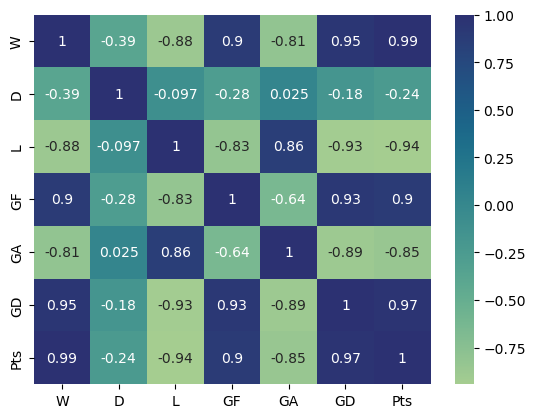

In [9]:
past_stats = past_seasons_df[['W','D','L','GF','GA','GD','Pts']].copy()
#past_stats
sns.heatmap(past_stats.corr(), annot=True, cmap='crest')

All the stats clearly correlate with the amount of points a team earns.

### **Typical Stats of Top 4 and Bottom 3 Teams**

In [10]:
top_four = seasons_top_four[['W','D','L','GF','GA','GD','Pts']].copy()
bottom_three = seasons_bottom_three[['W','D','L','GF','GA','GD','Pts']].copy()


In [11]:

# Visual parameters
t4_color = '#3d195b'
b3_color = '#c9d6df'
b_color = '#f7f7f7'
seaborn_color = [b3_color, t4_color]
sns.set_palette(sns.color_palette(seaborn_color))
t4_legend = mpatches.Patch(color=t4_color, label='Top 4', edgecolor='black')
b3_legend = mpatches.Patch(color=b3_color, label='Bottom 3', edgecolor='black')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  


#### **Wins, Draws, and Losses Distributions**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


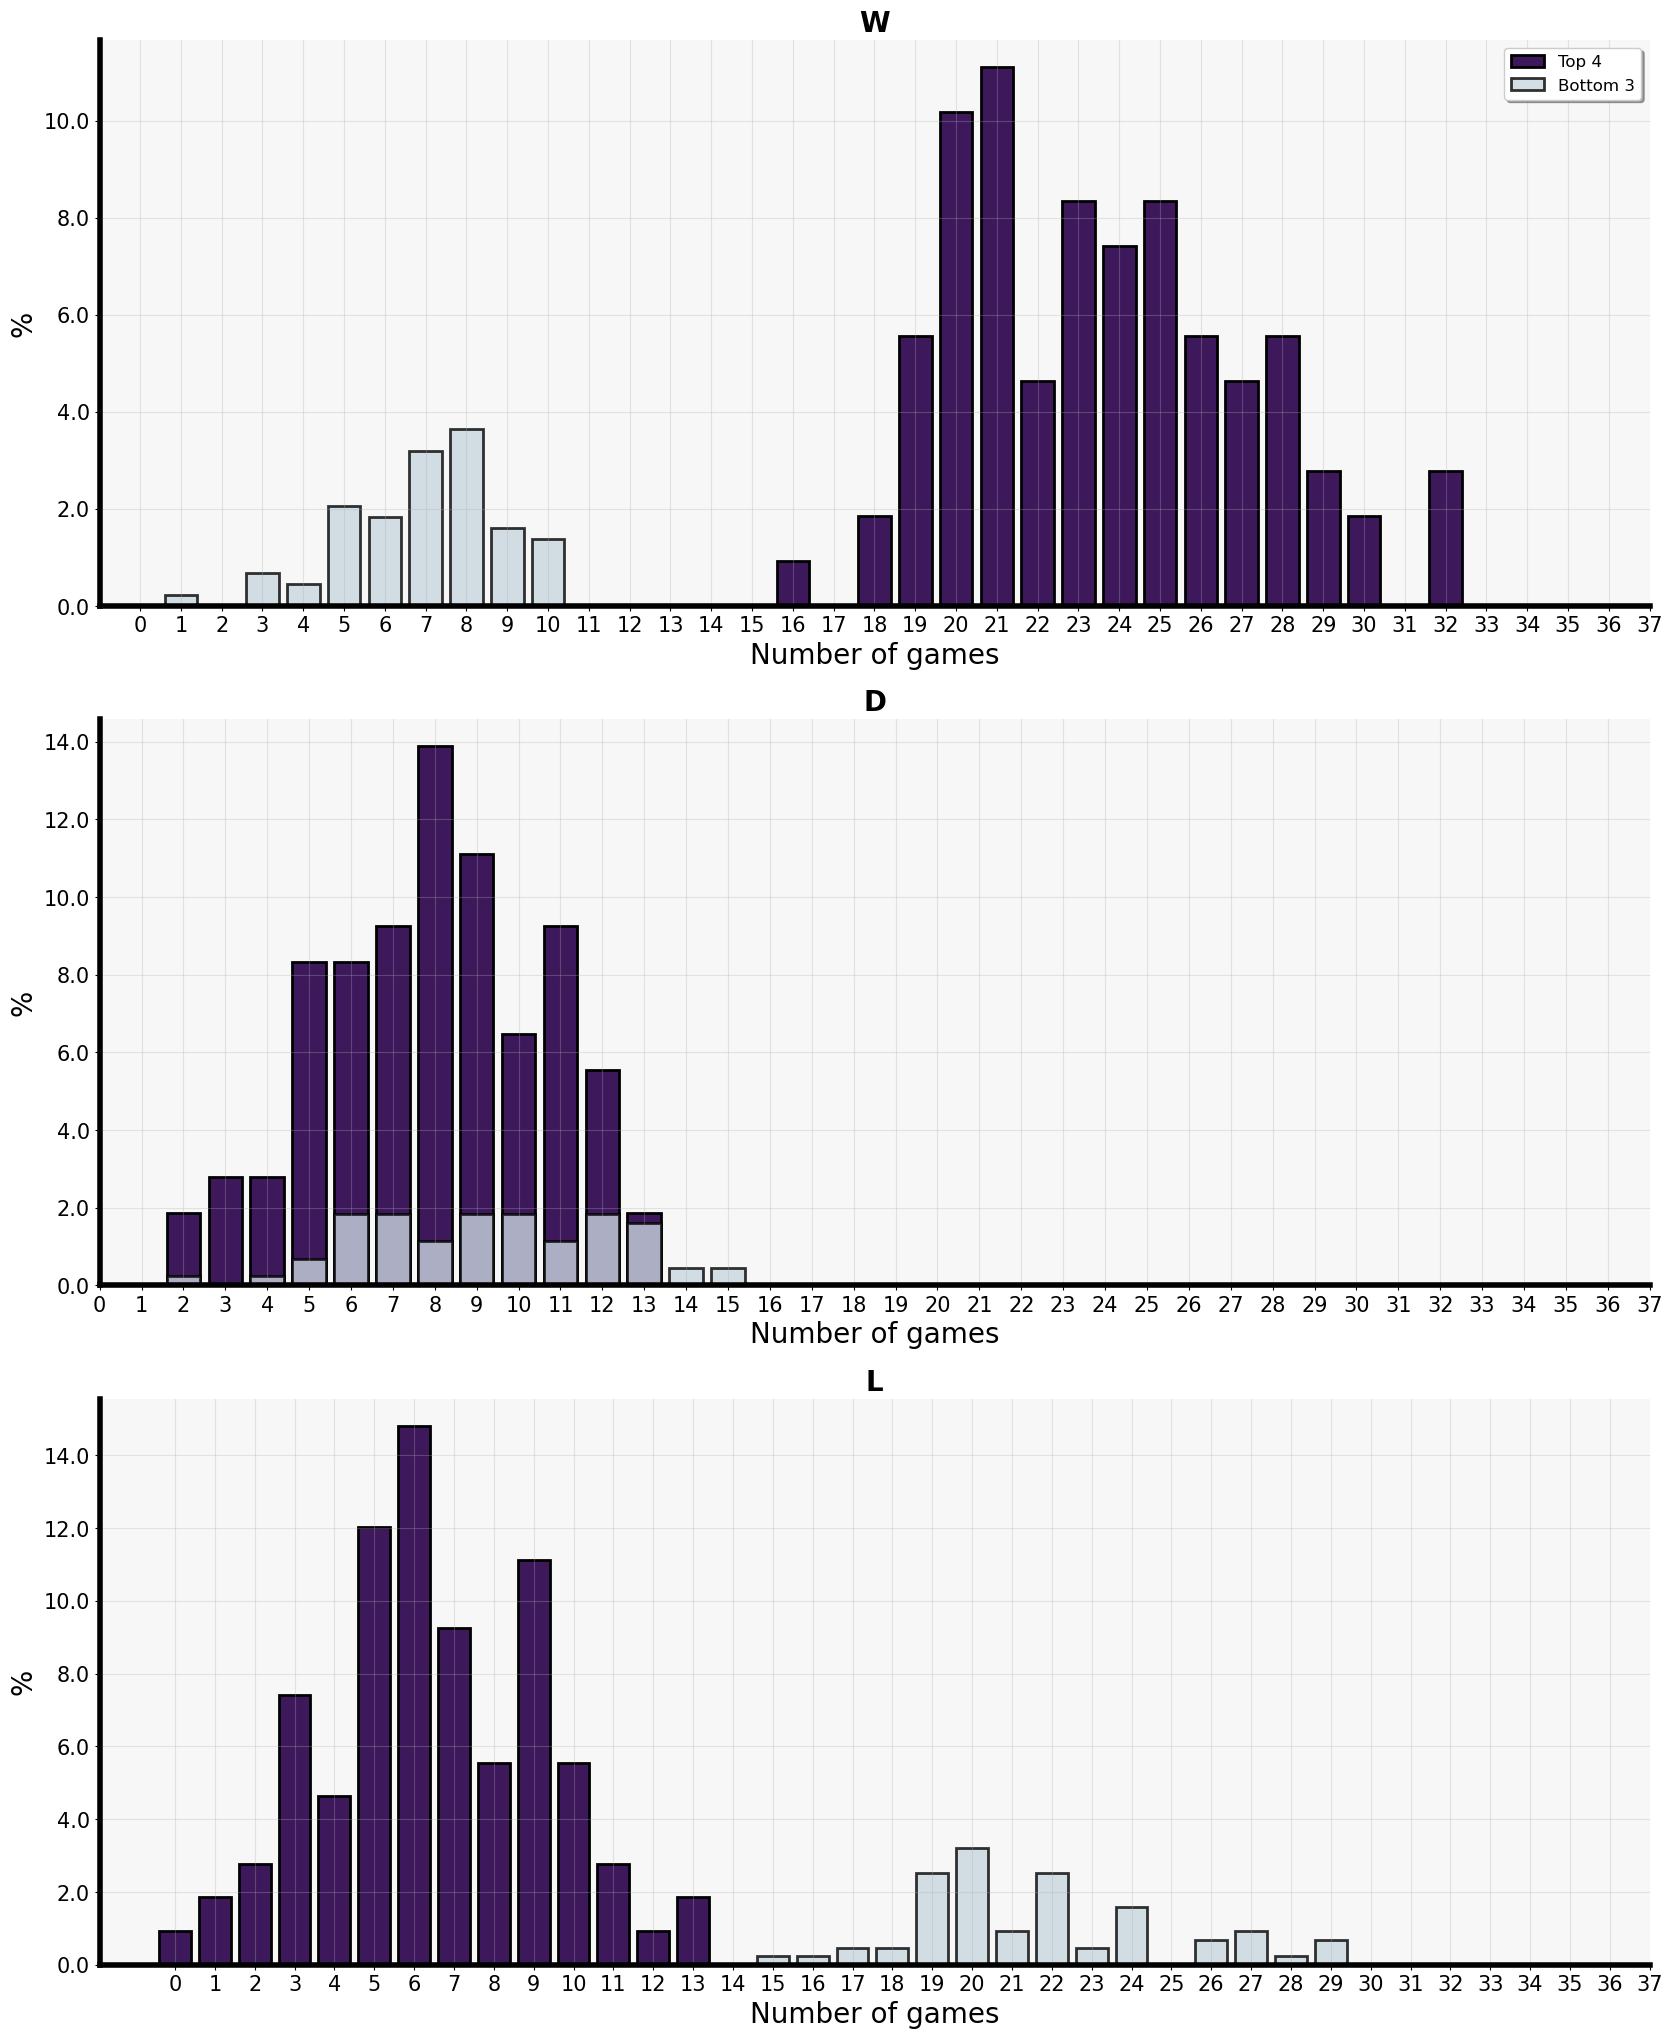

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(20,25))
cols = ['W','D','L']

for i, col in enumerate(cols):
    t4_index = top_four[col].value_counts().index
    t4_values = top_four[col].value_counts().values
    b3_index = bottom_three[col].value_counts().index
    b3_values = bottom_three[col].value_counts().values
    
    ax.flatten()[i].bar(x=t4_index, height=t4_values/1.08, color=t4_color, edgecolor='black', alpha=1, linewidth=2, label='Top 4')
    ax.flatten()[i].bar(x=b3_index, height=b3_values/4.38, color=b3_color, edgecolor='black', alpha=0.8, linewidth=2, label='Bottom 3')
    
    ax.flatten()[i].grid(which='major', axis='x', zorder=0, alpha=0.3)
    ax.flatten()[i].grid(which='major', axis='y', zorder=0, alpha=0.3)
    
    ax.flatten()[i].set_xticks(np.arange(0, 38, 1))
    ax.flatten()[i].set_xticklabels(ax.flatten()[i].get_xticks(), fontsize=15)
    ax.flatten()[i].set_yticklabels(ax.flatten()[i].get_yticks(), fontsize=15)
    ax.flatten()[i].set_xlabel('Number of games', fontsize=20)
    ax.flatten()[i].set_ylabel('%', fontsize=20)
    ax.flatten()[i].set_title(col.upper(), weight='bold', fontsize=20)
    ax.flatten()[i].set_facecolor(b_color)
    
    ax.flatten()[i].spines['top'].set_visible(False)
    ax.flatten()[i].spines['right'].set_visible(False)
    ax.flatten()[i].spines['bottom'].set_linewidth(4)
    ax.flatten()[i].spines['left'].set_linewidth(4)
    
    if i == 0:
        ax.flatten()[i].legend(loc=1, shadow=True, fontsize=12)

#### **Points Distribution**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


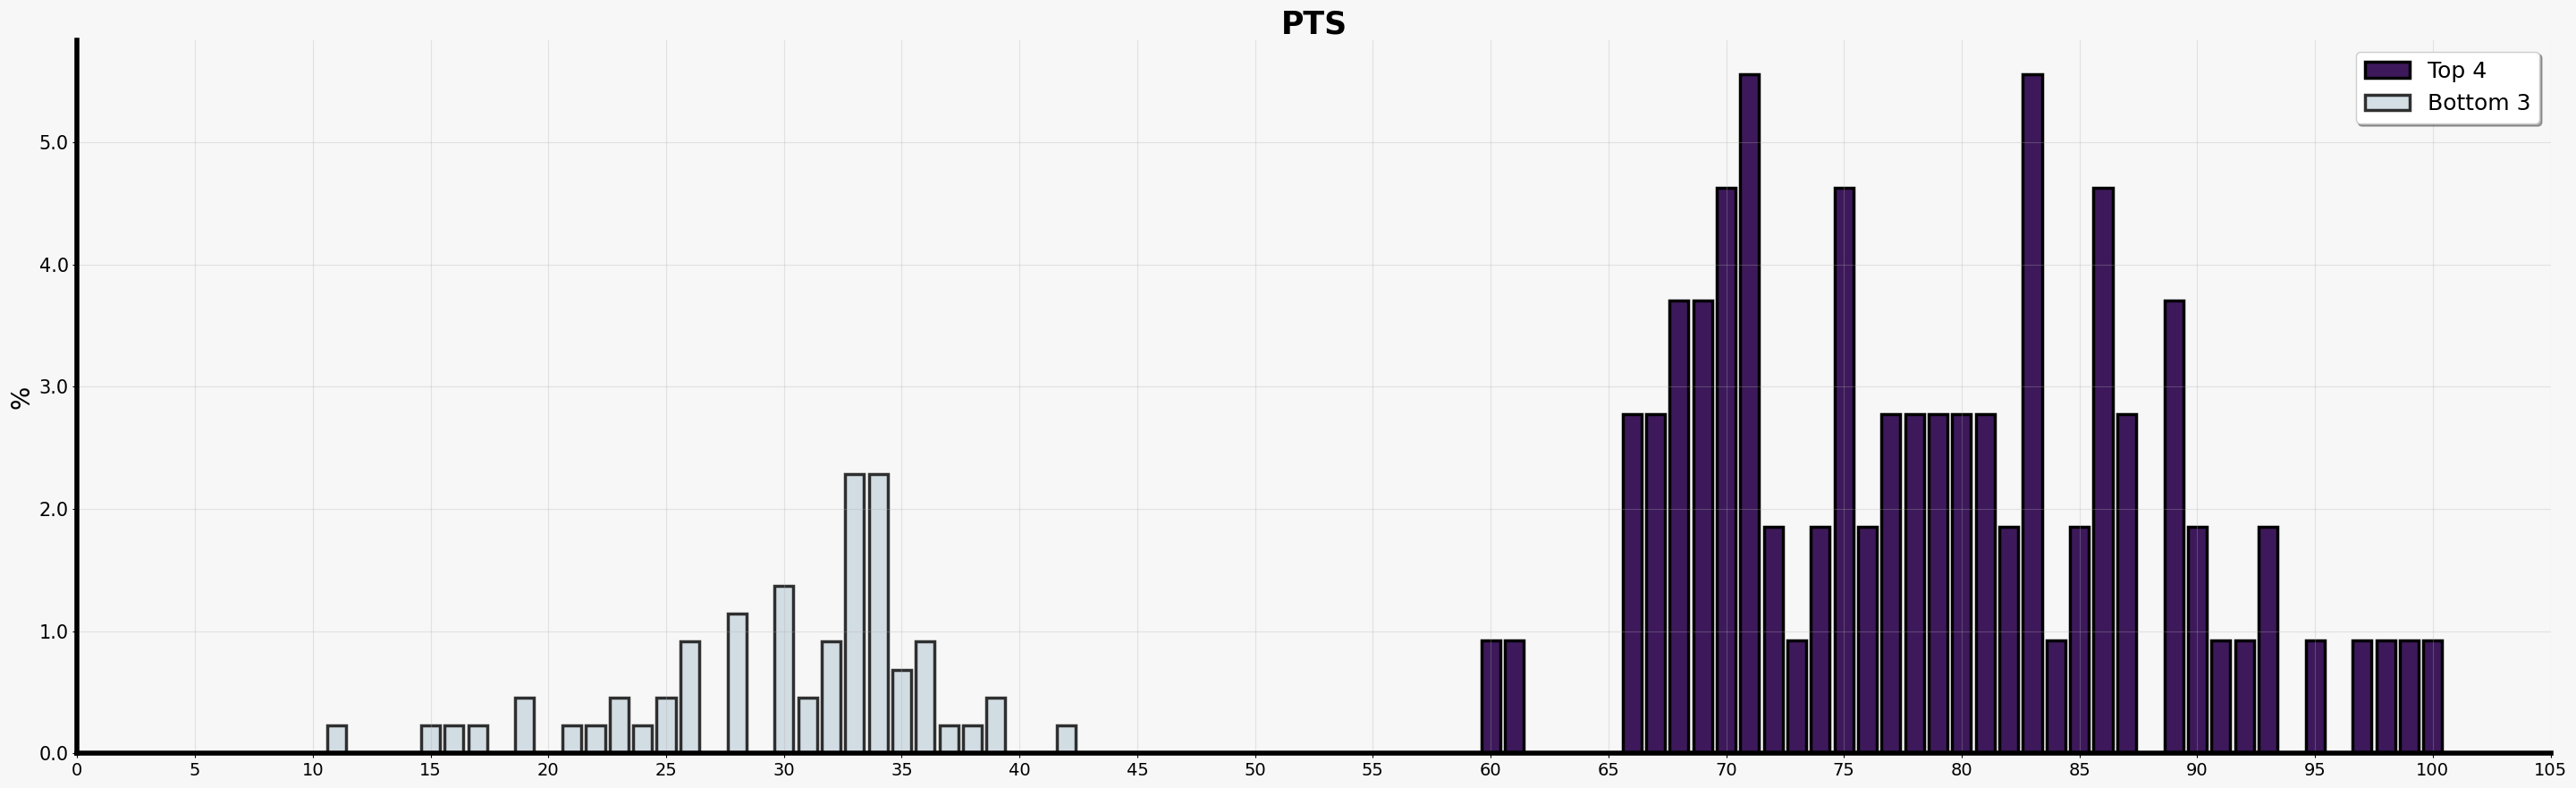

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(30,10))
col = 'Pts'

t4_index = top_four[col].value_counts().index
t4_values = top_four[col].value_counts().values
b3_index = bottom_three[col].value_counts().index
b3_values = bottom_three[col].value_counts().values

ax.bar(x=t4_index, height=t4_values/1.08, color=t4_color, edgecolor='black', alpha=1, linewidth=2.5, label='Top 4')
ax.bar(x=b3_index, height=b3_values/4.38, color=b3_color, edgecolor='black', alpha=0.8, linewidth=2.5, label='Bottom 3')

ax.grid(which='major', axis='x', zorder=0, alpha=0.3)
ax.grid(which='major', axis='y', zorder=0, alpha=0.3)

ax.set_xticks(np.arange(0, 110, 5))
ax.set_title(col.upper(), weight='bold', fontsize=25)
ax.set_ylabel('%', fontsize=20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_facecolor(b_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)

ax.legend(loc=1, shadow=True, fontsize=18)

fig.set_facecolor(b_color)
fig.tight_layout(pad=5)
plt.show()

#### **GF and GA Distributions**

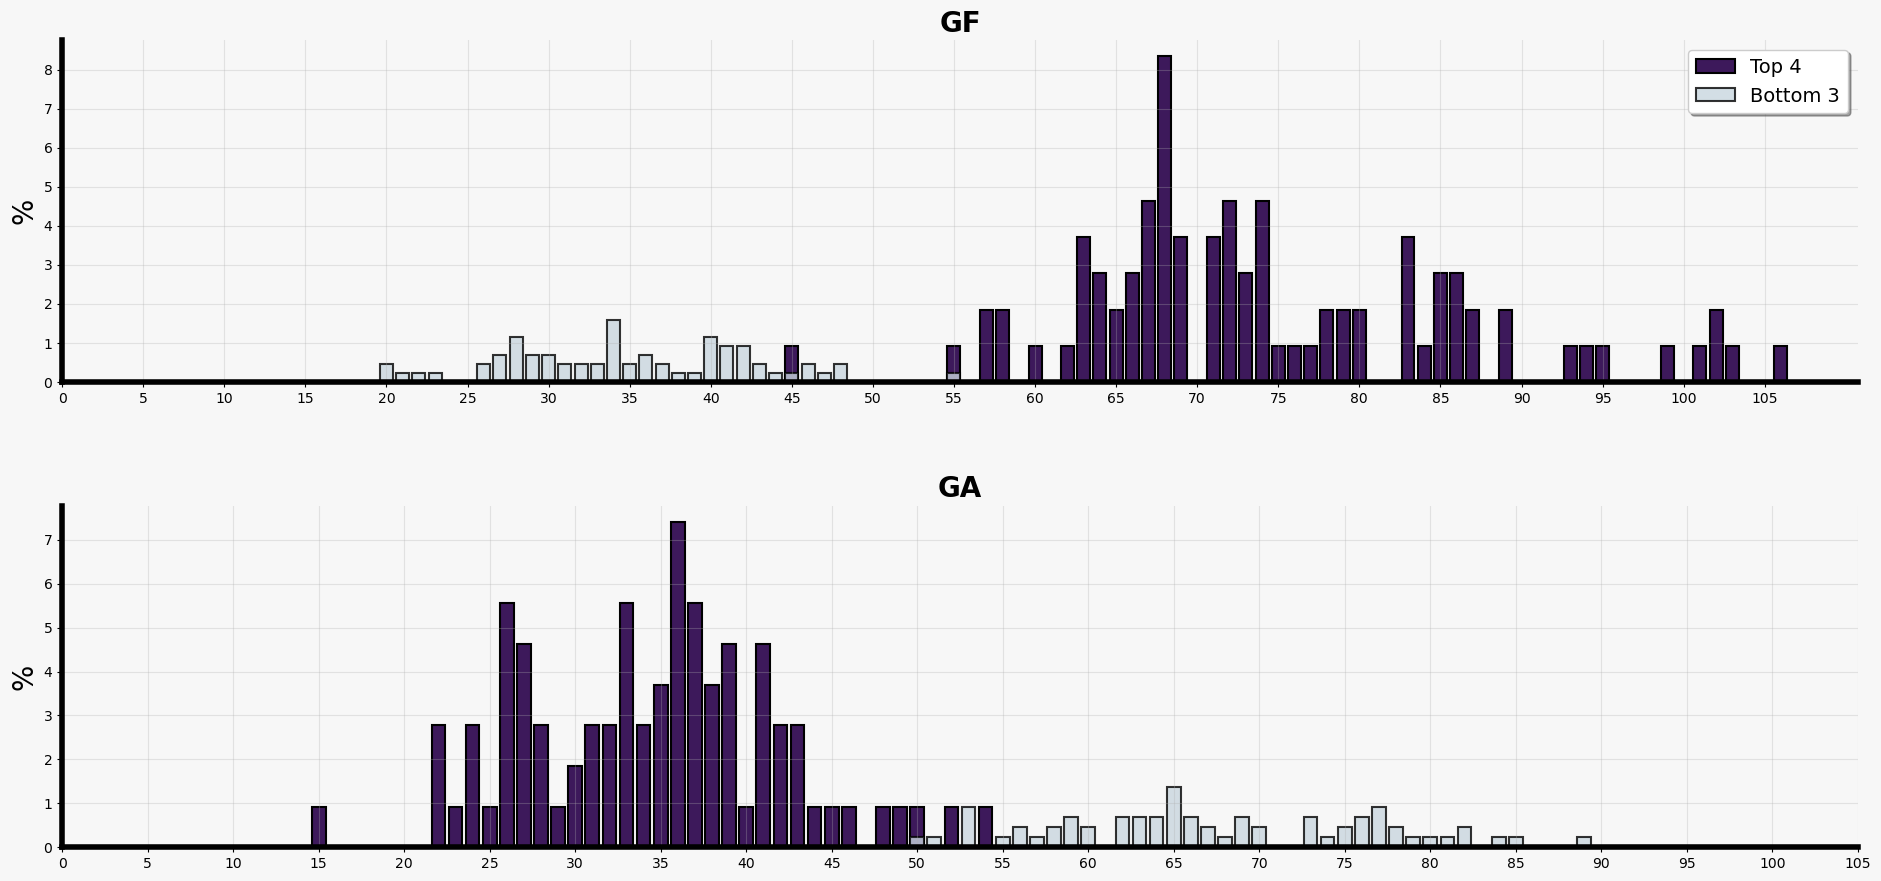

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
cols = ['GF', 'GA']

for i, col in enumerate(cols):
    t4_index = top_four[col].value_counts().index
    t4_values = top_four[col].value_counts().values
    b3_index = bottom_three[col].value_counts().index
    b3_values = bottom_three[col].value_counts().values
    
    ax.flatten()[i].bar(x=t4_index, height=t4_values/1.08, color=t4_color, edgecolor='black', alpha=1, linewidth=1.5, label='Top 4')
    ax.flatten()[i].bar(x=b3_index, height=b3_values/4.38, color=b3_color, edgecolor='black', alpha=0.8, linewidth=1.5, label='Bottom 3')
    
    ax.flatten()[i].grid(which='major', axis='x', zorder=0, alpha=0.3)
    ax.flatten()[i].grid(which='major', axis='y', zorder=0, alpha=0.3)
    
    ax.flatten()[i].set_xticks(np.arange(0, 110, 5))
    ax.flatten()[i].set_title(col.upper(), weight='bold', fontsize=20)
    ax.flatten()[i].set_ylabel('%', fontsize=20)
    ax.flatten()[i].set_facecolor(b_color)
    
    ax.flatten()[i].spines['top'].set_visible(False)
    ax.flatten()[i].spines['right'].set_visible(False)
    ax.flatten()[i].spines['bottom'].set_linewidth(4)
    ax.flatten()[i].spines['left'].set_linewidth(4)
    
    if i == 0:
        ax.flatten()[i].legend(loc=1, shadow=True, fontsize=14)

fig.set_facecolor(b_color)
fig.set_edgecolor('black')
fig.tight_layout(pad=5)
plt.show()

In [15]:
past_seasons_df.loc[(past_seasons_df['Pos'] == 4) & (past_seasons_df['GD'] < 0)]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
83,2004-05,4,Everton,38,18,7,13,45,46,-1,61


Everton is the only team to finish in the top four with a negative GD from the seasons covered in provided data.

# **Train Model With Data**

In [16]:
def train(X, y, X_valid, y_valid):
    knn = KNeighborsClassifier(n_neighbors=8)
    dt  = DecisionTreeClassifier(max_depth = 5)
    rf = RandomForestClassifier(n_estimators=100, max_features= 5)
    
    knn.fit(X, y)
    dt.fit(X, y)
    rf.fit(X, y)
    
    knn_pred = knn.predict(X_valid)
    df_pred = dt.predict(X_valid)
    rf_pred = rf.predict(X_valid)
    
    
    
    
    
    print((f'K-Nearest Neighbors: {round(f1_score(y_valid,knn_pred),3)*100:.0f}% \n' 
           f' Decision Tree: {round(f1_score(y_valid,df_pred),3)*100:.0f}% \n' 
           f' Random Forest: {round(f1_score(y_valid,rf_pred),3)*100:.0f}%'))
    
    return [knn, dt, rf]


def plot_learning(X, y):
    knn = KNeighborsClassifier(n_neighbors=8)
    dt  = DecisionTreeClassifier(max_depth = 5)
    rf = RandomForestClassifier(n_estimators=100, max_features= 7)
    
    models = [knn, dt, rf]
    
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    
    for i in range(3):
        train_sizes, train_score, test_scores = learning_curve(models[i], X, y, cv=5)
        ax.flatten()[i].plot(train_sizes, np.mean(train_score, axis=1), 'o-', color=b3_color, label='Training')
        ax.flatten()[i].plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color=t4_color, label='CV')
        ax.flatten()[i].legend()
        ax.flatten()[i].set_title(f'{models[i]}')

In [17]:
past_seasons = past_seasons_df.drop('Team', axis=1)
past_seasons['Top 4'] = 0
past_seasons['Bottom 3'] = 0

past_seasons.loc[past_seasons['Pos'] <= 4, 'Top 4'] = 1
past_seasons.loc[past_seasons['Pos'] >= 18, 'Bottom 3'] = 1
p_seasons = past_seasons.drop(columns=['Pos','Season','Pld'], axis=1)

p_seasons


,W,D,L,GF,GA,GD,Pts,Top 4,Bottom 3
0,24,8,6,79,31,48,80,1,0
1,20,10,8,63,38,25,70,1,0
2,20,9,9,71,39,32,69,1,0
3,20,8,10,64,43,21,68,1,0
4,20,6,12,57,42,15,66,0,0
...,...,...,...,...,...,...,...,...,...
435,11,6,21,43,66,-23,39,0,0
436,9,11,18,42,79,-37,38,0,0
437,7,14,17,34,53,-19,35,0,1
438,6,5,27,34,77,-43,23,0,1


In [18]:
# Split Train and Test sets: first is for predicting top 4, second is for predicting bottom three
X_seasons_train, X_seasons_test, y_seasons_train, y_seasons_test = train_test_split(p_seasons.drop(columns=['Top 4','Bottom 3'], axis=1), 
                                                                        p_seasons['Top 4'], 
                                                                        test_size=0.4, 
                                                                        random_state=2023, 
                                                                        stratify=p_seasons['Top 4'])

X_seasons2_train, X_seasons2_test, y_seasons2_train, y_seasons2_test = train_test_split(p_seasons.drop(columns=['Top 4','Bottom 3'], axis=1), 
                                                                        p_seasons['Bottom 3'], 
                                                                        test_size=0.4, 
                                                                        random_state=2023, 
                                                                        stratify=p_seasons['Bottom 3'])

# Split Test set for validation set
X_seasons_valid, X_seasons_test, y_seasons_valid, y_seasons_test = train_test_split(X_seasons_test, 
                                                                        y_seasons_test, 
                                                                        test_size=0.5, 
                                                                        random_state=2023, 
                                                                        stratify=y_seasons_test)

X_seasons2_valid, X_seasons2_test, y_seasons2_valid, y_seasons2_test = train_test_split(X_seasons2_test, 
                                                                        y_seasons2_test, 
                                                                        test_size=0.5, 
                                                                        random_state=2023, 
                                                                        stratify=y_seasons2_test)


In [19]:
X_seasons_test

,W,D,L,GF,GA,GD,Pts
240,28,5,5,86,43,43,89
85,16,10,12,49,44,5,58
215,9,15,14,40,61,-21,42
27,12,14,12,46,47,-1,50
385,16,11,11,61,47,14,59
...,...,...,...,...,...,...,...
171,12,9,17,38,55,-17,45
258,6,10,22,43,73,-30,28
317,9,10,19,44,65,-21,37
389,15,9,14,43,50,-7,54


### **Top 4 Learning**

In [20]:
t4_knn, t4_dt, t4_rf = train(X_seasons_train, y_seasons_train, X_seasons_valid, y_seasons_valid)

K-Nearest Neighbors: 94% 
 Decision Tree: 90% 
 Random Forest: 94%


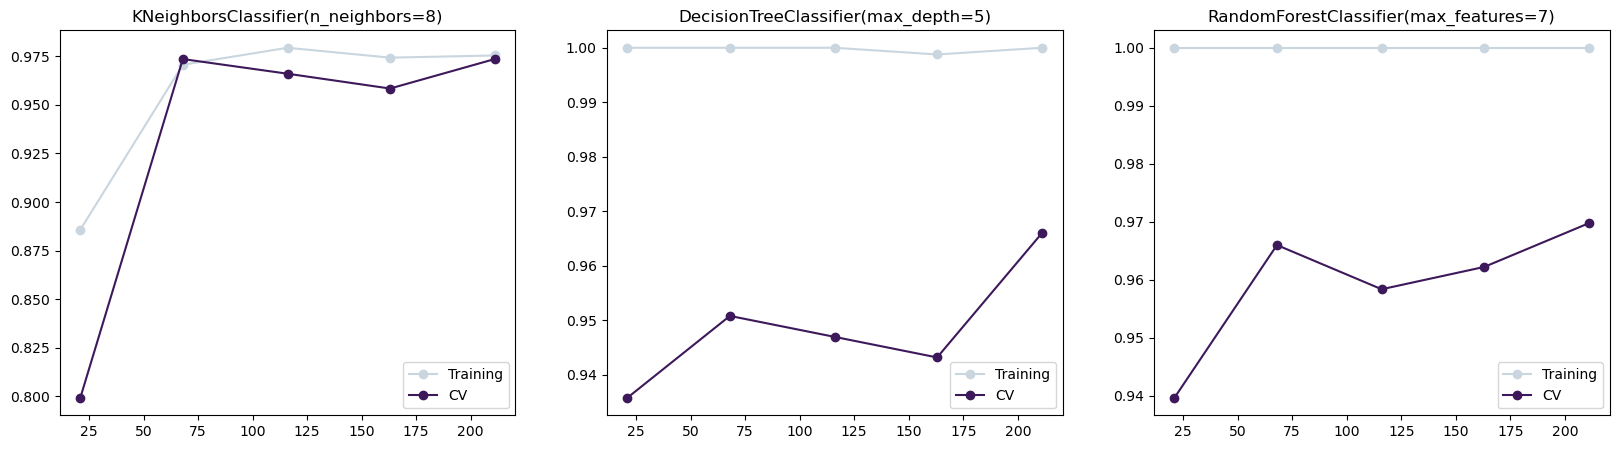

In [21]:
plot_learning(X_seasons_train, y_seasons_train)

### **Bottom 3 Learning**

In [22]:
b3_knn, b3_dt, b3_rf = train(X_seasons2_train, y_seasons2_train, X_seasons2_valid, y_seasons2_valid)

K-Nearest Neighbors: 76% 
 Decision Tree: 88% 
 Random Forest: 88%


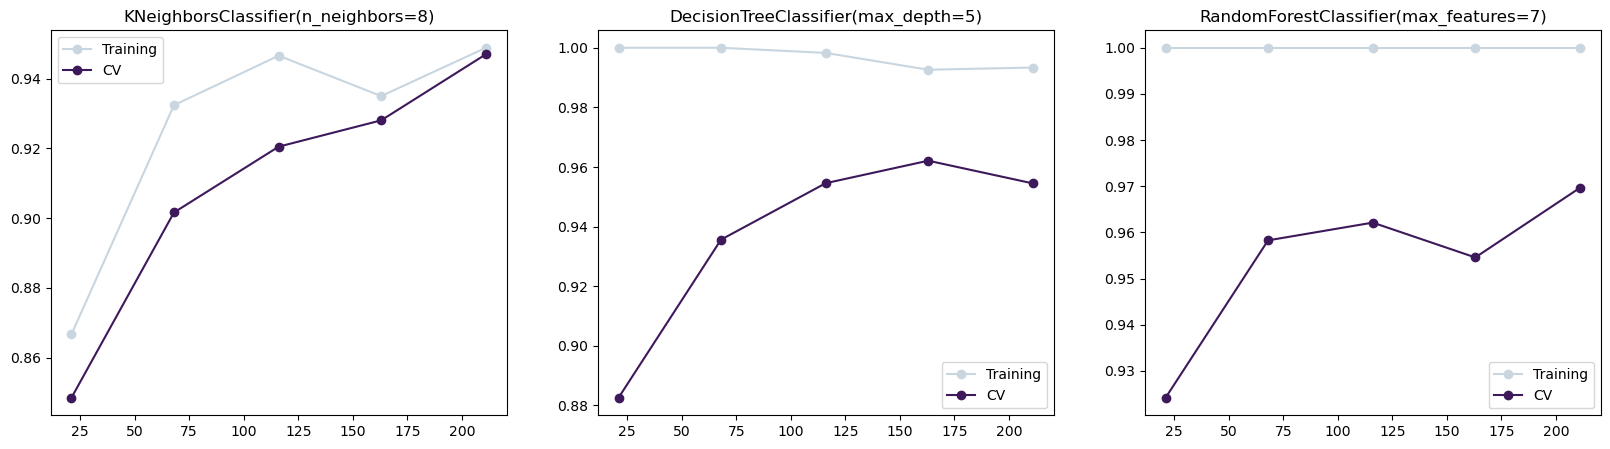

In [23]:
plot_learning(X_seasons2_train, y_seasons2_train)

# **Predicting Current Season Standings**

#### Current season standings dataframe

In [24]:
#create dataframe for current season; edited csv from https://www.footballwebpages.co.uk/premier-league/league-table to match other dataframes
current_season_df = pd.read_csv('/kaggle/input/epl-latest-season/latest_current_season.csv')
current_season_df.index += 1

current_season_df

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
1,2022-23,1,Arsenal,31,23,5,3,74,31,43,74
2,2022-23,2,Manchester City,30,22,4,4,78,28,50,70
3,2022-23,3,Manchester United,30,18,5,7,46,37,9,59
4,2022-23,4,Newcastle United,30,15,11,4,48,24,24,56
5,2022-23,5,Tottenham Hotspur,31,16,5,10,57,45,12,53
6,2022-23,6,Aston Villa,31,15,5,11,44,40,4,50
7,2022-23,7,Brighton & Hove Albion,29,14,7,8,54,37,17,49
8,2022-23,8,Liverpool,30,13,8,9,56,36,20,47
9,2022-23,9,Brentford,31,10,13,8,47,42,5,43
10,2022-23,10,Fulham,30,12,6,12,42,41,1,42


In [25]:
current_season = current_season_df.copy()
current_season = current_season.reset_index(drop=True)
current_season['Top 4'] = 0
current_season['Bottom 3'] = 0

current_season.loc[current_season['Pos'] <= 4, 'Top 4'] = 1
current_season.loc[current_season['Pos'] >= 18, 'Bottom 3'] = 1

y_test_t4 = current_season['Top 4'].copy()
y_test_b3 = current_season['Bottom 3'].copy()

teams = current_season[['Pos','Team']].copy()

In [26]:
current_season = current_season.drop(columns=['Season','Pld','Pos','Team','Top 4', 'Bottom 3'])
current_season

,W,D,L,GF,GA,GD,Pts
0,23,5,3,74,31,43,74
1,22,4,4,78,28,50,70
2,18,5,7,46,37,9,59
3,15,11,4,48,24,24,56
4,16,5,10,57,45,12,53
5,15,5,11,44,40,4,50
6,14,7,8,54,37,17,49
7,13,8,9,56,36,20,47
8,10,13,8,47,42,5,43
9,12,6,12,42,41,1,42


In [27]:
y_test_b3

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
Name: Bottom 3, dtype: int64

### Predicting top 4

In [28]:
print((f't4_knn: {round(f1_score(y_test_t4, t4_knn.predict(current_season)),3)*100:.0f}% \n'
      f't4_df: {round(f1_score(y_test_t4, t4_dt.predict(current_season)),3)*100:.0f}% \n'
      f't4_rf: {round(f1_score(y_test_t4, t4_rf.predict(current_season)),3)*100:.0f}%'))

t4_knn: 67% 
t4_df: 67% 
t4_rf: 67%


In [29]:
avg_pred_t4 = (t4_knn.predict_proba(current_season)[:, 1] + t4_rf.predict_proba(current_season)[:, 1]) / 2
avg_pred_t4

array([0.995, 0.995, 0.005, 0.01 , 0.   , 0.   , 0.005, 0.005, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [30]:
pd.concat([teams,pd.Series(avg_pred_t4, name='ensemble_result'),pd.Series(y_test_t4, name='Top 4')], axis=1)

,Pos,Team,ensemble_result,Top 4
0,1,Arsenal,0.995,1
1,2,Manchester City,0.995,1
2,3,Manchester United,0.005,1
3,4,Newcastle United,0.010,1
4,5,Tottenham Hotspur,0.000,0
5,6,Aston Villa,0.000,0
6,7,Brighton & Hove Albion,0.005,0
7,8,Liverpool,0.005,0
8,9,Brentford,0.000,0
9,10,Fulham,0.000,0


### Predicting bottom three

In [31]:
print((f'b3_knn: {round(f1_score(y_test_b3, b3_knn.predict(current_season)),3)*100:.0f}% \n'
      f'b3_dt: {round(f1_score(y_test_b3, b3_dt.predict(current_season)),3)*100:.0f}% \n'
      f'b3_rf: {round(f1_score(y_test_b3, b3_rf.predict(current_season)),3)*100:.0f}%'))

b3_knn: 67% 
b3_dt: 80% 
b3_rf: 55%


In [32]:
avg_pred_b3 = (b3_knn.predict_proba(current_season)[:, 1] + b3_dt.predict_proba(current_season)[:, 1]) / 2
avg_pred_b3

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.0625, 0.25  , 0.0625, 0.1875,
       0.375 , 0.4375, 0.5625, 1.    ])

# **Final Result**

In [33]:
final_table = pd.concat([teams,pd.Series(current_season['Pts'], name='Points'),pd.Series(avg_pred_t4, name='t4_ensemble_result'),pd.Series(y_test_t4, name='Top 4'),
          pd.Series(avg_pred_b3, name='b3_ensemble_result'),pd.Series(y_test_b3, name='Bottom 3')], axis=1)

def highlight(s):
    if s['t4_ensemble_result'] > 0:
        return ['background-color: green'] * len(s)
    if s['b3_ensemble_result'] >= 0.8:
        return ['background-color: red'] * len(s)
    if s['b3_ensemble_result'] > 0:
        return ['background-color: orange'] * len(s)

    
final_table = final_table.style.apply(highlight, axis=1)
final_table

,Pos,Team,Points,t4_ensemble_result,Top 4,b3_ensemble_result,Bottom 3
0,1,Arsenal,74,0.995000,1,0.000000,0
1,2,Manchester City,70,0.995000,1,0.000000,0
2,3,Manchester United,59,0.005000,1,0.000000,0
3,4,Newcastle United,56,0.010000,1,0.000000,0
4,5,Tottenham Hotspur,53,0.000000,0,0.000000,0
5,6,Aston Villa,50,0.000000,0,0.000000,0
6,7,Brighton & Hove Albion,49,0.005000,0,0.000000,0
7,8,Liverpool,47,0.005000,0,0.000000,0
8,9,Brentford,43,0.000000,0,0.000000,0
9,10,Fulham,42,0.000000,0,0.000000,0


The models predicts most of the current top four and bottom three teams to remain the same by the end of the season (Liverpool is given higher probability than Manchester United, for top 4, while Everton is given a higher probability than ). Of course, a lot can change with about 7 matches left in the season. The model for predicting the bottom three also shows that every team from the 11th place (where Chelsea currently is) is still in danger of ending up in the bottom three.

## **Closing**

* More features (xG per game, # of chances created per game, etc) would have allowed for more descriptive enalysis and possibly detailed predictions (predicted place for all teams)

* Still gained insight to what teams are not completely safe from relegation at this point in the season.